In [51]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [52]:
dataset = pd.read_csv('spambase_data.csv')
dataset

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [53]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 0)

In [85]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [86]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [87]:
predTree = drugTree.predict(X_test)

In [88]:
print (predTree [0:59])
print (y_test [0:59])


[1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0
 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1]
[1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1]


In [89]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.906832298136646


In [90]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

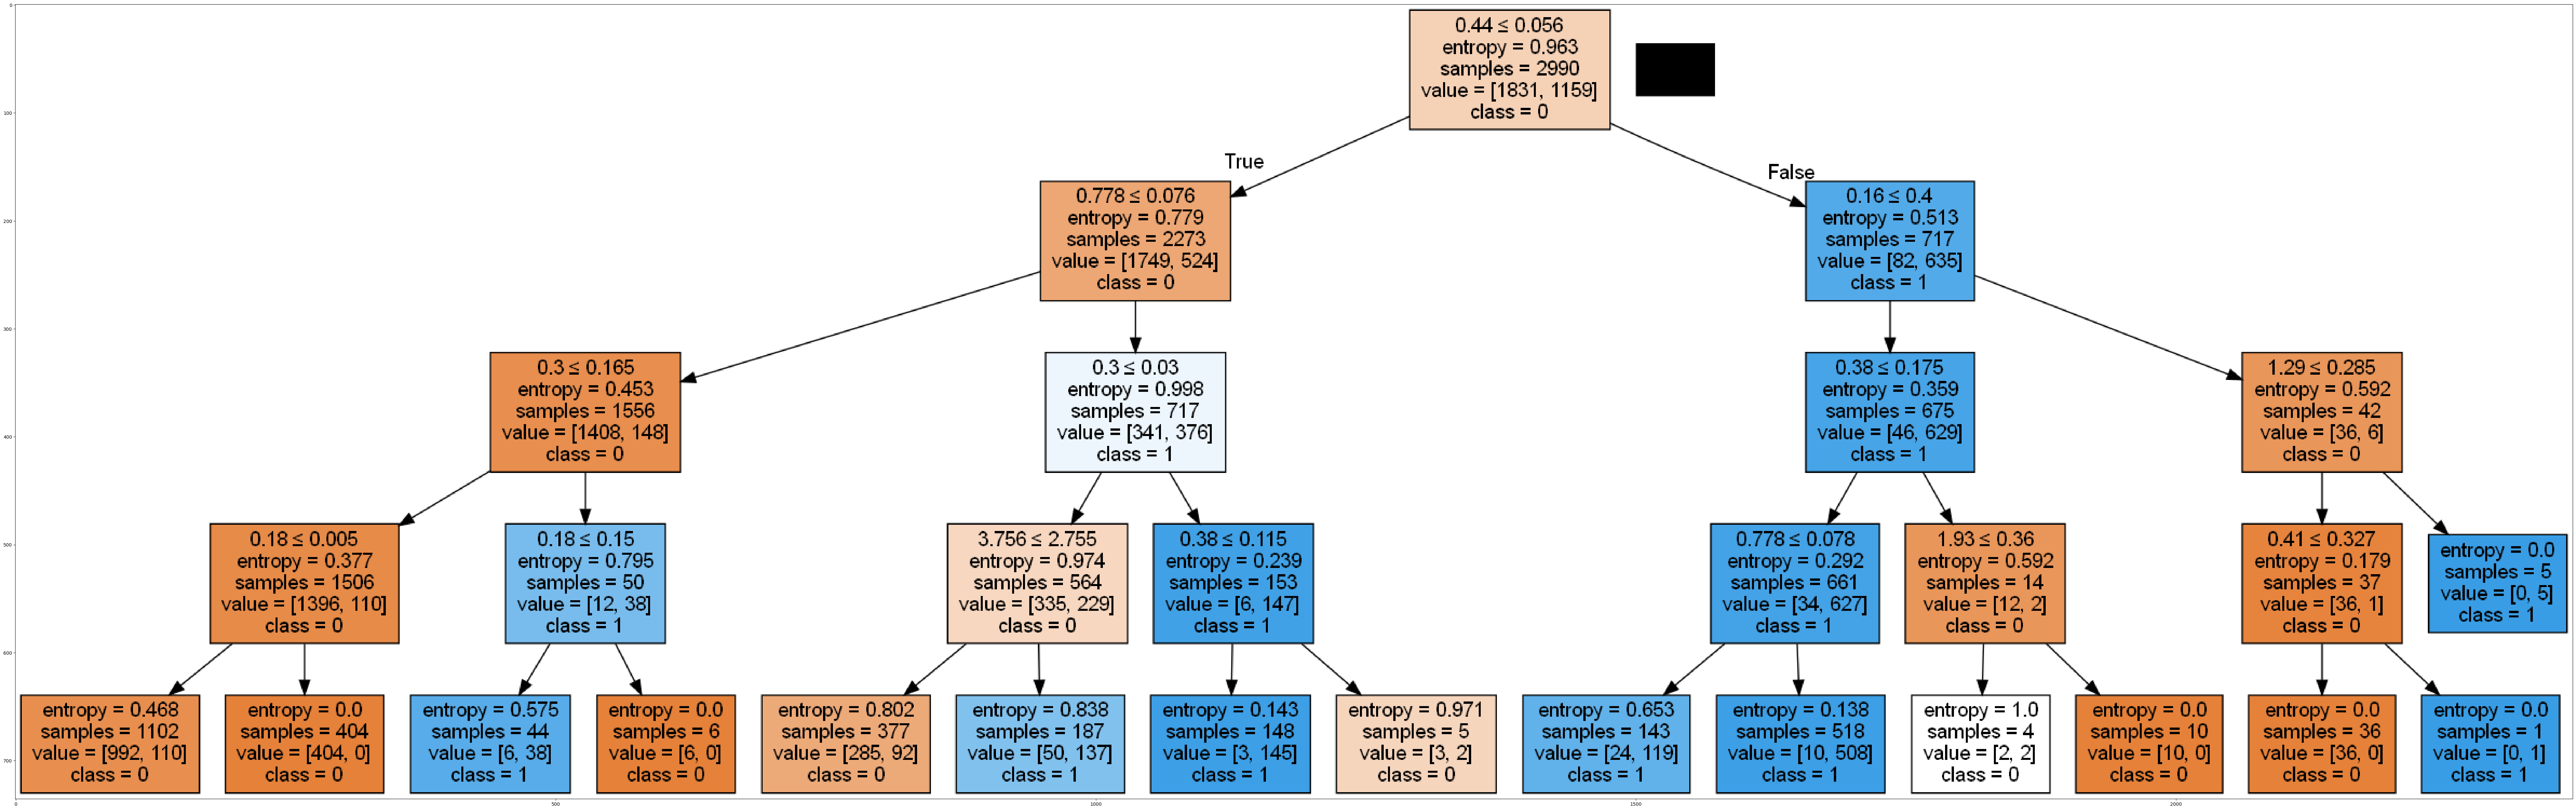

In [91]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = dataset.columns[0:57]
targetNames = pd.Series(dataset.iloc[:, -1].values).unique().tolist()
class_names = list(map(str, np.unique(y_train)))
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= class_names, filled=True,  special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')